In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/energy-consumption-patterns/summer_peaks.csv
/kaggle/input/energy-consumption-patterns/timeseries_energy_power.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [3]:
df = pd.read_csv("//kaggle/input/energy-consumption-patterns/timeseries_energy_power.csv")

df.head()

,year,dt,energy,power
0,2018,2018-01-01T00:00:00Z,157.6,630.4
1,2018,2018-01-01T00:15:00Z,162.8,651.2
2,2018,2018-01-01T00:30:00Z,155.6,622.4
3,2018,2018-01-01T00:45:00Z,161.6,646.4
4,2018,2018-01-01T01:00:00Z,156.0,624.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164860 entries, 0 to 164859
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   year    164860 non-null  int64  
 1   dt      164860 non-null  object 
 2   energy  164860 non-null  float64
 3   power   164860 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.0+ MB


In [5]:
df.isnull().sum()

year      0
dt        0
energy    0
power     0
dtype: int64

In [6]:
df['timestamp'] = pd.to_datetime(df['dt'])
df['date'] = df['timestamp'].dt.date
df['time'] = df['timestamp'].dt.time

In [7]:
df.head()

,year,dt,energy,power,timestamp,date,time
0,2018,2018-01-01T00:00:00Z,157.6,630.4,2018-01-01 00:00:00+00:00,2018-01-01,00:00:00
1,2018,2018-01-01T00:15:00Z,162.8,651.2,2018-01-01 00:15:00+00:00,2018-01-01,00:15:00
2,2018,2018-01-01T00:30:00Z,155.6,622.4,2018-01-01 00:30:00+00:00,2018-01-01,00:30:00
3,2018,2018-01-01T00:45:00Z,161.6,646.4,2018-01-01 00:45:00+00:00,2018-01-01,00:45:00
4,2018,2018-01-01T01:00:00Z,156.0,624.0,2018-01-01 01:00:00+00:00,2018-01-01,01:00:00


In [8]:
df=df.drop('dt',axis=1)
df.head()

,year,energy,power,timestamp,date,time
0,2018,157.6,630.4,2018-01-01 00:00:00+00:00,2018-01-01,00:00:00
1,2018,162.8,651.2,2018-01-01 00:15:00+00:00,2018-01-01,00:15:00
2,2018,155.6,622.4,2018-01-01 00:30:00+00:00,2018-01-01,00:30:00
3,2018,161.6,646.4,2018-01-01 00:45:00+00:00,2018-01-01,00:45:00
4,2018,156.0,624.0,2018-01-01 01:00:00+00:00,2018-01-01,01:00:00


In [9]:
daily_profiles = (
    df
    .pivot_table(
        index='date',
        columns=df['timestamp'].dt.hour * 2 + df['timestamp'].dt.minute // 30,
        values='power',
        aggfunc='mean'
    )
    .dropna()
)


In [10]:
scaler = StandardScaler()
daily_scaled = scaler.fit_transform(daily_profiles)


In [11]:
k = 5  # between 4–6 as required
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(daily_scaled)

daily_profiles['cluster'] = labels


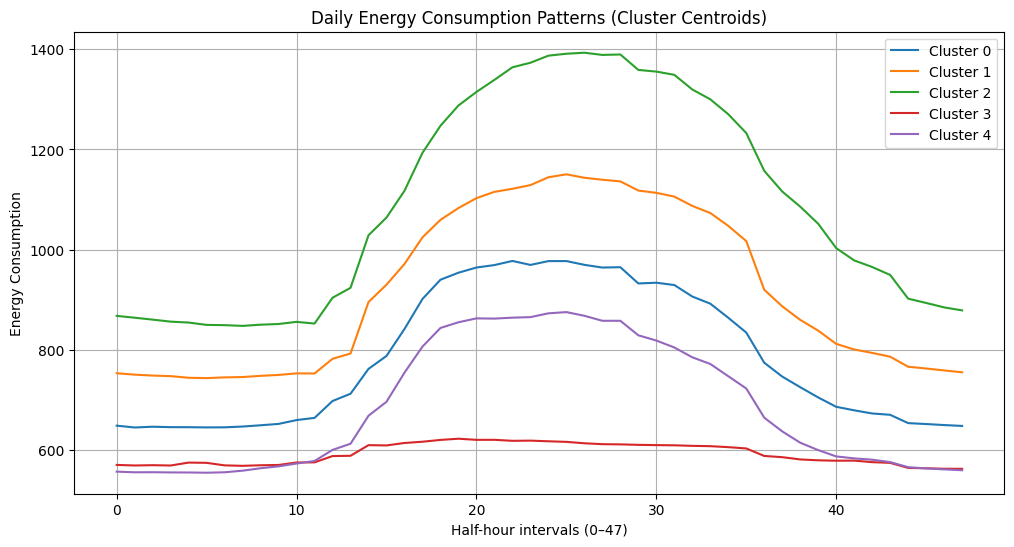

In [12]:
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)

plt.figure(figsize=(12, 6))

for i, centroid in enumerate(centroids):
    plt.plot(centroid, label=f'Cluster {i}')

plt.xlabel("Half-hour intervals (0–47)")
plt.ylabel("Energy Consumption")
plt.title("Daily Energy Consumption Patterns (Cluster Centroids)")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for i, centroid in enumerate(centroids):
    plt.plot(centroid, label=f'Cluster {i}')

plt.xlabel("Half-hour intervals (0–47)")
plt.ylabel("Energy Consumption")
plt.title("Daily Energy Consumption Patterns (Cluster Centroids)")
plt.legend()
plt.grid(True)

plt.savefig("cluster_centroids.png", dpi=300, bbox_inches="tight")
plt.close()


In [14]:
daily_profiles.to_csv("daily_energy_clusters.csv")


In [15]:
daily_profiles[['cluster']].to_csv("cluster_labels.csv")


In [16]:
import zipfile

zip_filename = "energy_consumption_clustering_deliverables.zip"

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write("cluster_centroids.png")
    zipf.write("daily_energy_clusters.csv")
    zipf.write("cluster_labels.csv")

print("ZIP file created:", zip_filename)


ZIP file created: energy_consumption_clustering_deliverables.zip
